In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from functools import partial
from tqdm import tqdm

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#### Load problem specific starter code

In [2]:
cd 'cs228/pa5'

/Users/lmcintosh/code/ipython-notebooks/classes/cs228/pa5


In [3]:
ls

starter.py           surveylabeled.dat    surveyunlabeled.dat


In [95]:
from starter_functions import *

In [8]:
LABELED_FILE = "surveylabeled.dat"
UNLABELED_FILE = "surveyunlabeled.dat"

In [9]:
Xij, Zij, N, M = read_labeled_matrix(LABELED_FILE)

In [13]:
Zij[(1,17)]

1.0

In [14]:
len(Zij.keys())

100

In [22]:
N

5

In [23]:
M

20

In [17]:
sum([Zij[k] for k in Zij.keys()])

57.0

In [27]:
class_ones = []
for k in Xij.keys():
    if Zij[k] > 0:
        class_ones.append(Xij[k])

In [29]:
np.mean(np.stack(class_ones), axis=0)

matrix([[ 1.04922807,  0.98085965]])

In [31]:
np.mean(np.stack([Xij[k] for k in Xij.keys() if Zij[k] > 0]), axis=0)

matrix([[ 1.04922807,  0.98085965]])

In [59]:
mean0 = np.mean(np.stack([Xij[k] for k in Xij.keys() if Zij[k] < 1]), axis=0)
mean1 = np.mean(np.stack([Xij[k] for k in Xij.keys() if Zij[k] > 0]), axis=0)

In [75]:
sigma0 = np.dot((np.stack([Xij[k] for k in Xij.keys() if Zij[k] < 1]) - mean0).T, 
                (np.stack([Xij[k] for k in Xij.keys() if Zij[k] < 1]) - mean0))

In [76]:
sigma0 / sum([1 - Zij[k] for k in Zij.keys()])

matrix([[ 0.30811884,  0.28553768],
        [ 0.28553768,  0.81346635]])

In [64]:
class_zero_sum = sum([1.0 - Zij[k] for k in Zij.keys()])
sigma0 = np.matrix([[0.0,0.0],[0.0,0.0]])
for i in range(N):
    for j in range(M):
        if Zij[(i,j)] < 1:
            sigma0 += (1./class_zero_sum) * np.outer(Xij[(i,j)] - mean0, Xij[(i,j)] - mean0)

In [65]:
sigma0

matrix([[ 0.30811884,  0.28553768],
        [ 0.28553768,  0.81346635]])

In [48]:
pi_fun, mean0_fun, mean1_fun, sigma0_fun, sigma1_fun = MLE_Estimation()

In [108]:
sigma0_fun

matrix([[ 0.30811884,  0.28553768],
        [ 0.28553768,  0.81346635]])

In [122]:
sigma1_fun

matrix([[ 0.77827888,  0.19683566],
        [ 0.19683566,  0.24996938]])

# A.i

In [109]:
pi, mu0, mu1, sigma0, sigma1 = MLE_Estimation()

colorprint("MLE estimates for PA part A.i:", "teal")
colorprint("\tpi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
    %(pi, mu0, mu1, sigma0, sigma1), "red")

MLE estimates for PA part A.i:
	pi: 0.57
	mu_0: [[-0.99437209 -1.11730233]]
	mu_1: [[ 1.04922807  0.98085965]]
	sigma_0: [[ 0.30811884  0.28553768]
 [ 0.28553768  0.81346635]]
	sigma_1: [[ 0.77827888  0.19683566]
 [ 0.19683566  0.24996938]]


# A.ii

[-2608.5402236526552, -2572.3551114614652, -2571.9884479844054]
{'pi': 0.58616150703175707, 'sigma_1': matrix([[ 0.72112418,  0.14499114],
        [ 0.14499114,  0.30825171]]), 'sigma_0': matrix([[ 0.36212646,  0.31082931],
        [ 0.31082931,  0.75836101]]), 'mu_1': matrix([[ 0.98729587,  0.99618266]]), 'mu_0': matrix([[-1.04406391, -1.02551825]])}
{'pi': 0.98524478207970745, 'sigma_1': matrix([[ 1.56239328,  1.19963746],
        [ 1.19963746,  1.48374471]]), 'sigma_0': matrix([[ 0.11134185, -0.00745395],
        [-0.00745395,  0.00318123]]), 'mu_1': matrix([[ 0.16871858,  0.1785235 ]]), 'mu_0': matrix([[-1.32753719, -1.10905458]])}
{'pi': 0.4720210914522926, 'sigma_1': matrix([[ 0.58860917,  0.62747758],
        [ 0.62747758,  1.18495658]]), 'sigma_0': matrix([[ 0.77977576,  0.18474526],
        [ 0.18474526,  0.3281041 ]]), 'mu_1': matrix([[-0.84773525, -0.7584965 ]]), 'mu_0': matrix([[ 1.03562833,  0.98025004]])}


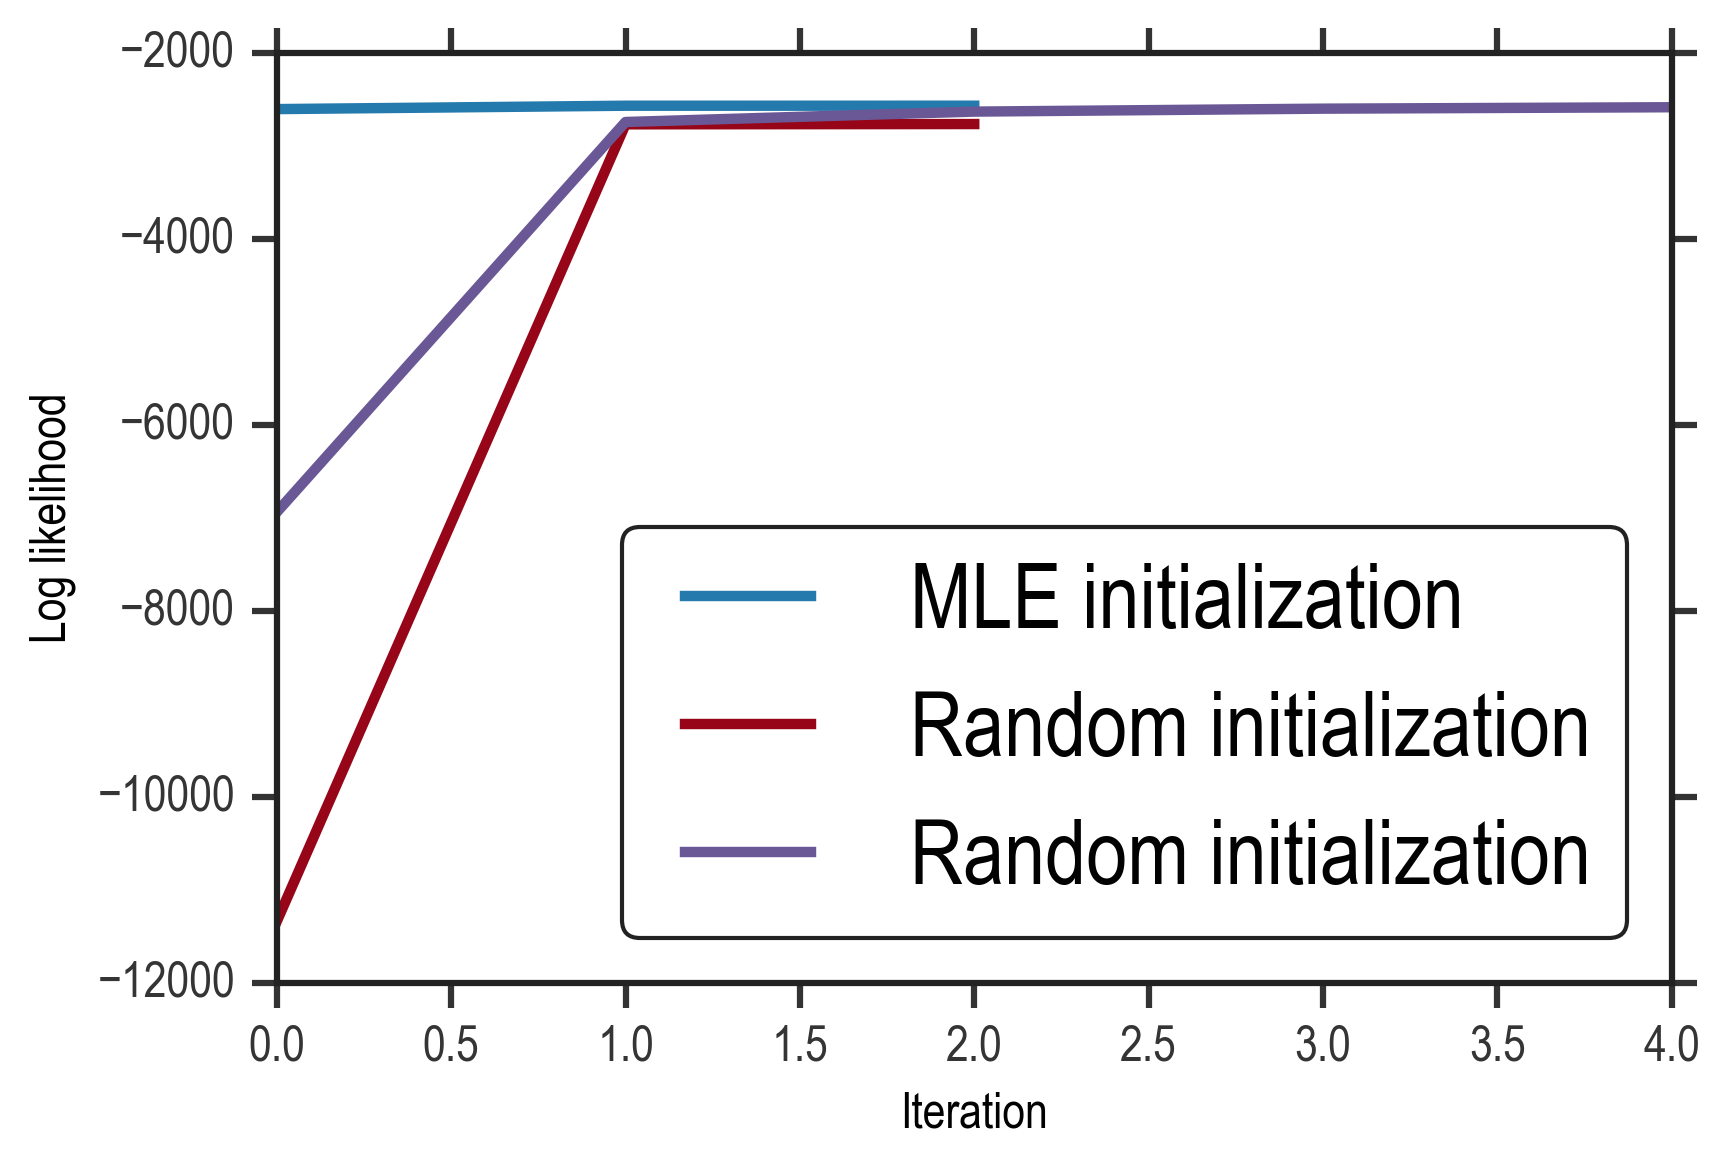

In [112]:
def random_covariance():
    P = np.matrix(np.random.randn(2,2))
    D = np.matrix(np.diag(np.random.rand(2) * 0.5 + 1.0))
    return P*D*P.T

X, N, M = read_unlabeled_matrix(UNLABELED_FILE)

# initialization strategy 1
params = {}
pi, mu_0, mu_1, sigma_0, sigma_1 = MLE_Estimation()    
MLE_phi, MLE_lambda = MLE_of_phi_and_lamdba()
params['pi'] = pi
params['mu_0'] = mu_0
params['mu_1'] = mu_1
params['sigma_0'] = sigma_0
params['sigma_1'] = sigma_1
params, log_likelihood = perform_em_modelA(X, N, M, params)
print log_likelihood
params_list = [params]
log_likelihood_list = [log_likelihood]

for _ in range(2):
    params = {}
    params['pi'] = np.random.rand()
    params['mu_0'] = np.random.randn(1,2)
    params['mu_1'] = np.random.randn(1,2)
    params['sigma_0'] = random_covariance()
    params['sigma_1'] = random_covariance()
    params, log_likelihood = perform_em_modelA(X, N, M, params)
    params_list.append(params)
    log_likelihood_list.append(log_likelihood)

plt.figure()
for i, params in enumerate(params_list):
    print params
    plt.plot(log_likelihood_list[i])
plt.legend(['MLE initialization', 'Random initialization', 'Random initialization'], loc=4)
plt.xlabel('Iteration')
plt.ylabel('Log likelihood')
plt.show()


In [125]:
log_likelihood_list[2]

[-6942.9613171723477,
 -2747.2644043374216,
 -2635.5287677085303,
 -2603.8752572312223,
 -2588.5718214348753]

In [121]:
for l in log_likelihood_list:
    print('%0.2f' %(100.*(l[-1] - log_likelihood_list[0][-1])/log_likelihood_list[0][-1]))

-0.00
7.68
0.64


# Part B.i

In [128]:
MLE_phi, MLE_lambda = MLE_of_phi_and_lamdba()

colorprint("MLE estimates for PA part B.i:", "teal")
colorprint("\tMLE phi: %s\n\tMLE lambda: %s\n"%(MLE_phi, MLE_lambda), 'red')

MLE estimates for PA part B.i:
	MLE phi: 0.6
	MLE lambda: 0.93



# Part B.ii

In [149]:
X, N, M = read_unlabeled_matrix(UNLABELED_FILE)    
estimate_leanings_of_precincts(X, N, M, params=None)

[(0, 1.0, 1),
 (1, 1.0, 1),
 (2, 1.1068754364415868e-11, 0),
 (3, 0.99999999999997102, 1),
 (4, 1.7959922085069583e-16, 0),
 (5, 0.99999999999964373, 1),
 (6, 0.99999999999999978, 1),
 (7, 1.0, 1),
 (8, 1.0, 1),
 (9, 1.0, 1),
 (10, 4.1131760925573242e-11, 0),
 (11, 2.2721052694484882e-09, 0),
 (12, 4.7377654114598523e-15, 0),
 (13, 0.99999999999999889, 1),
 (14, 0.99999999991274147, 1),
 (15, 6.6307211160865829e-12, 0),
 (16, 1.9533010650785209e-14, 0),
 (17, 1.0, 1),
 (18, 1.0, 1),
 (19, 0.99999999999999989, 1),
 (20, 2.5869141669353829e-16, 0),
 (21, 1.0, 1),
 (22, 0.99999999996834699, 1),
 (23, 2.6585928944052464e-11, 0),
 (24, 0.99999999999999178, 1),
 (25, 5.7171252996404978e-10, 0),
 (26, 8.619958633430805e-15, 0),
 (27, 3.6809211713034645e-15, 0),
 (28, 1.0, 1),
 (29, 1.0377434865551919e-12, 0),
 (30, 1.0, 1),
 (31, 1.0, 1),
 (32, 0.99999999999999967, 1),
 (33, 1.1656312503716846e-11, 0),
 (34, 0.99999999999999811, 1),
 (35, 2.0312933443689464e-12, 0),
 (36, 1.0, 1),
 (37, 9.353

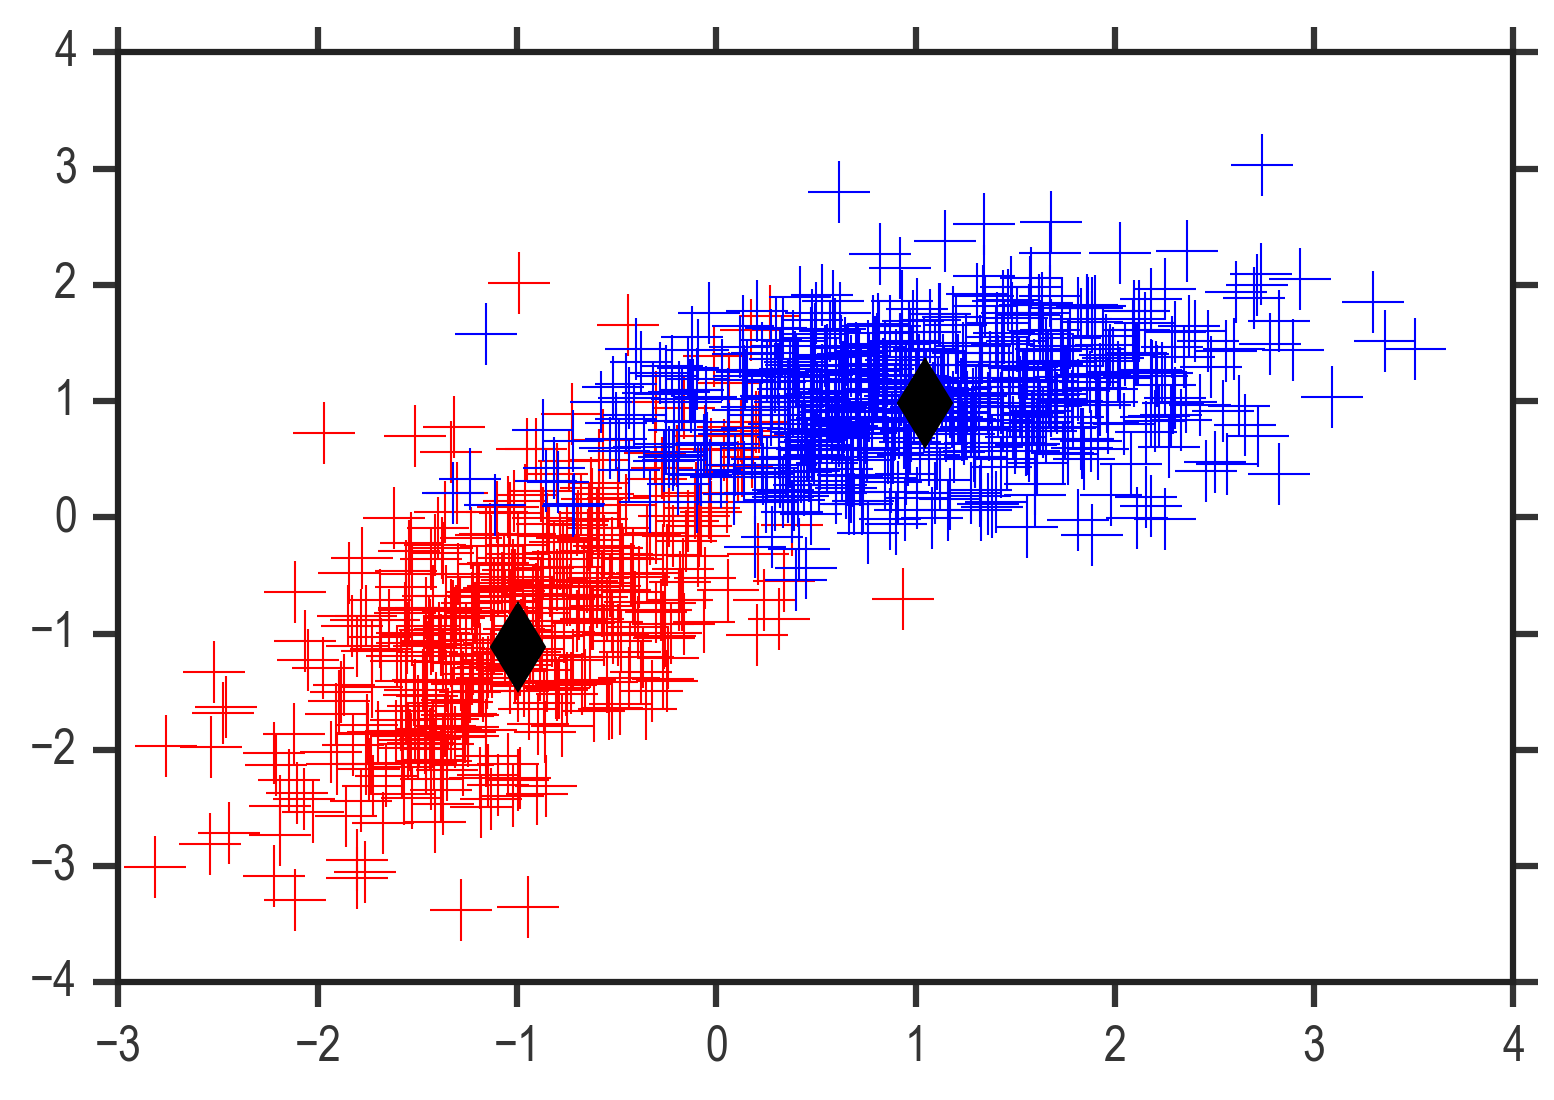

In [150]:
plot_individual_inclinations(X, N, M, params=None)

In [156]:
summary = estimate_leanings_of_precincts(X, N, M, params=None)
for (i, p, leaning) in summary:
    print('%d & %e & %d \\\\' %(i,p,leaning))

0 & 1.000000e+00 & 1 \\
1 & 1.000000e+00 & 1 \\
2 & 1.106875e-11 & 0 \\
3 & 1.000000e+00 & 1 \\
4 & 1.795992e-16 & 0 \\
5 & 1.000000e+00 & 1 \\
6 & 1.000000e+00 & 1 \\
7 & 1.000000e+00 & 1 \\
8 & 1.000000e+00 & 1 \\
9 & 1.000000e+00 & 1 \\
10 & 4.113176e-11 & 0 \\
11 & 2.272105e-09 & 0 \\
12 & 4.737765e-15 & 0 \\
13 & 1.000000e+00 & 1 \\
14 & 1.000000e+00 & 1 \\
15 & 6.630721e-12 & 0 \\
16 & 1.953301e-14 & 0 \\
17 & 1.000000e+00 & 1 \\
18 & 1.000000e+00 & 1 \\
19 & 1.000000e+00 & 1 \\
20 & 2.586914e-16 & 0 \\
21 & 1.000000e+00 & 1 \\
22 & 1.000000e+00 & 1 \\
23 & 2.658593e-11 & 0 \\
24 & 1.000000e+00 & 1 \\
25 & 5.717125e-10 & 0 \\
26 & 8.619959e-15 & 0 \\
27 & 3.680921e-15 & 0 \\
28 & 1.000000e+00 & 1 \\
29 & 1.037743e-12 & 0 \\
30 & 1.000000e+00 & 1 \\
31 & 1.000000e+00 & 1 \\
32 & 1.000000e+00 & 1 \\
33 & 1.165631e-11 & 0 \\
34 & 1.000000e+00 & 1 \\
35 & 2.031293e-12 & 0 \\
36 & 1.000000e+00 & 1 \\
37 & 9.353792e-14 & 0 \\
38 & 1.799203e-13 & 0 \\
39 & 1.000000e+00 & 1 \\
40 & 1.142

# Part B.iv

[-2607.9029664330619, -2574.1228600008794, -2573.9887036324062]
{'phi': 0.5600011064304663, 'sigma_1': matrix([[ 0.66976071,  0.12252738],
        [ 0.12252738,  0.29702353]]), 'sigma_0': matrix([[ 0.40219953,  0.36003078],
        [ 0.36003078,  0.84906651]]), 'mu_1': matrix([[ 1.03626588,  1.01685276]]), 'mu_0': matrix([[-1.00061541, -0.94608118]]), 'pi': 0.57, 'lambda': 0.8783479612667572}
{'phi': 1.177158822300188e-14, 'sigma_1': matrix([[ 0.5887977 ,  0.15201672],
        [ 0.15201672,  0.13191922]]), 'sigma_0': matrix([[ 1.6353156 ,  1.25578805],
        [ 1.25578805,  1.45321596]]), 'mu_1': matrix([[ 0.42228278,  1.46954506]]), 'mu_0': matrix([[ 0.1277922 ,  0.06994385]]), 'pi': 0.5769263369729302, 'lambda': 0.9359952343945289}
{'phi': 0.99814047472602352, 'sigma_1': matrix([[ 0.31033202,  0.21462218],
        [ 0.21462218,  0.69050482]]), 'sigma_0': matrix([[ 1.64352654,  1.28816314],
        [ 1.28816314,  1.55253507]]), 'mu_1': matrix([[-0.48951885,  0.05376986]]), 'mu_0': ma

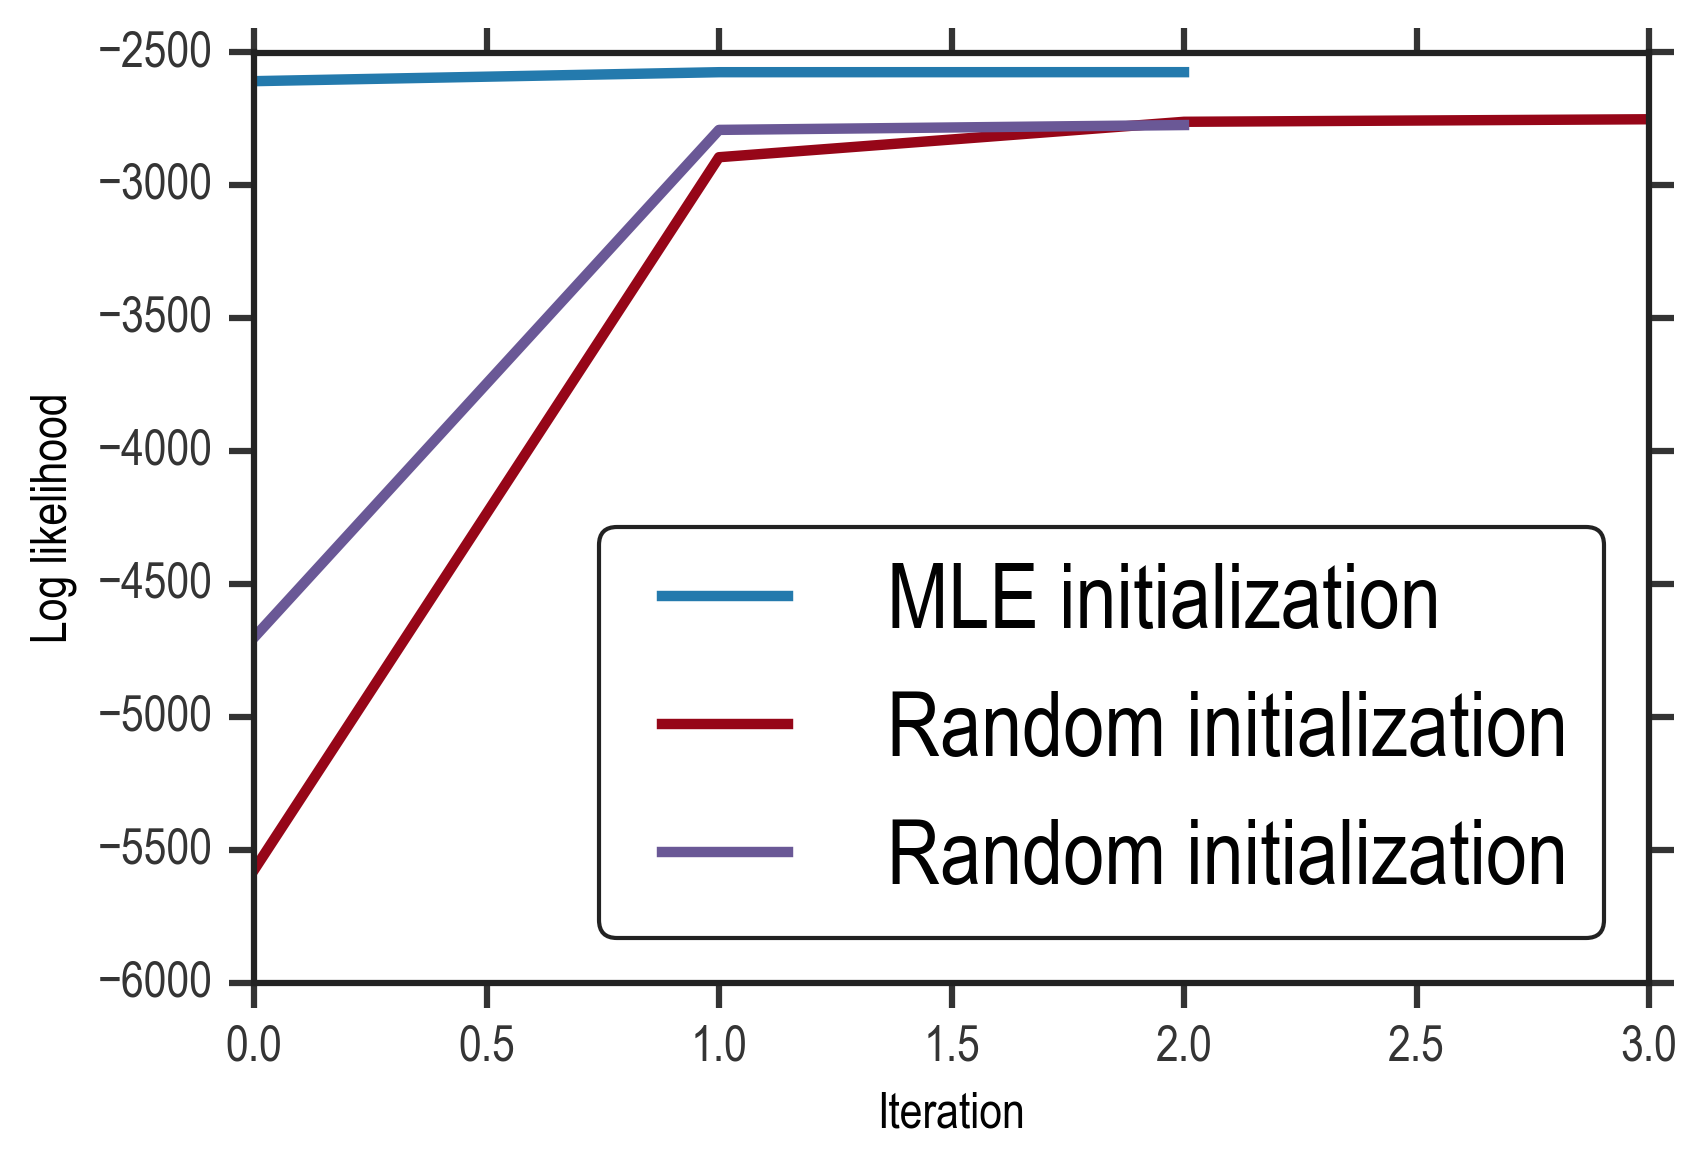

In [158]:
def random_covariance():
    P = np.matrix(np.random.randn(2,2))
    D = np.matrix(np.diag(np.random.rand(2) * 0.5 + 1.0))
    return P*D*P.T
X, N, M = read_unlabeled_matrix(UNLABELED_FILE)
# initialization strategy 1
params = {}
pi, mu_0, mu_1, sigma_0, sigma_1 = MLE_Estimation()    
MLE_phi, MLE_lambda = MLE_of_phi_and_lamdba()
params['pi'] = pi
params['mu_0'] = mu_0
params['mu_1'] = mu_1
params['sigma_0'] = sigma_0
params['sigma_1'] = sigma_1
params['phi'] = MLE_phi
params['lambda'] = MLE_lambda
params, log_likelihood = perform_em(X, N, M, params)
print log_likelihood
params_list = [params]
log_likelihood_list = [log_likelihood]

for _ in range(2):
    params = {}
    params['pi'] = np.random.rand()
    params['mu_0'] = np.random.randn(1,2)
    params['mu_1'] = np.random.randn(1,2)
    params['sigma_0'] = random_covariance()
    params['sigma_1'] = random_covariance()
    params['phi'] = np.random.rand()
    params['lambda'] = np.random.rand()
    params, log_likelihood = perform_em(X, N, M, params)
    params_list.append(params)
    log_likelihood_list.append(log_likelihood)

plt.figure()
for i, params in enumerate(params_list):
    print params
    plt.plot(log_likelihood_list[i])
plt.legend(['MLE initialization', 'Random initialization', 'Random initialization'], loc=4)
plt.xlabel('Iteration')
plt.ylabel('Log likelihood')
plt.show()

In [159]:
log_likelihood_list[0]

[-2607.9029664330619, -2574.1228600008794, -2573.9887036324062]

In [160]:
log_likelihood_list[1]

[-5576.830517672669,
 -2894.0940837943649,
 -2760.7842324800663,
 -2751.2229403655474]

In [161]:
log_likelihood_list[2]

[-4701.9515519863253, -2791.2559024520006, -2773.0589068212794]

# B.v

phi = 0.56000110643
sigma_1 = [[ 0.66976071  0.12252738]
 [ 0.12252738  0.29702353]]
sigma_0 = [[ 0.40219953  0.36003078]
 [ 0.36003078  0.84906651]]
mu_1 = [[ 1.03626588  1.01685276]]
mu_0 = [[-1.00061541 -0.94608118]]
pi = 0.57
lambda = 0.878347961267


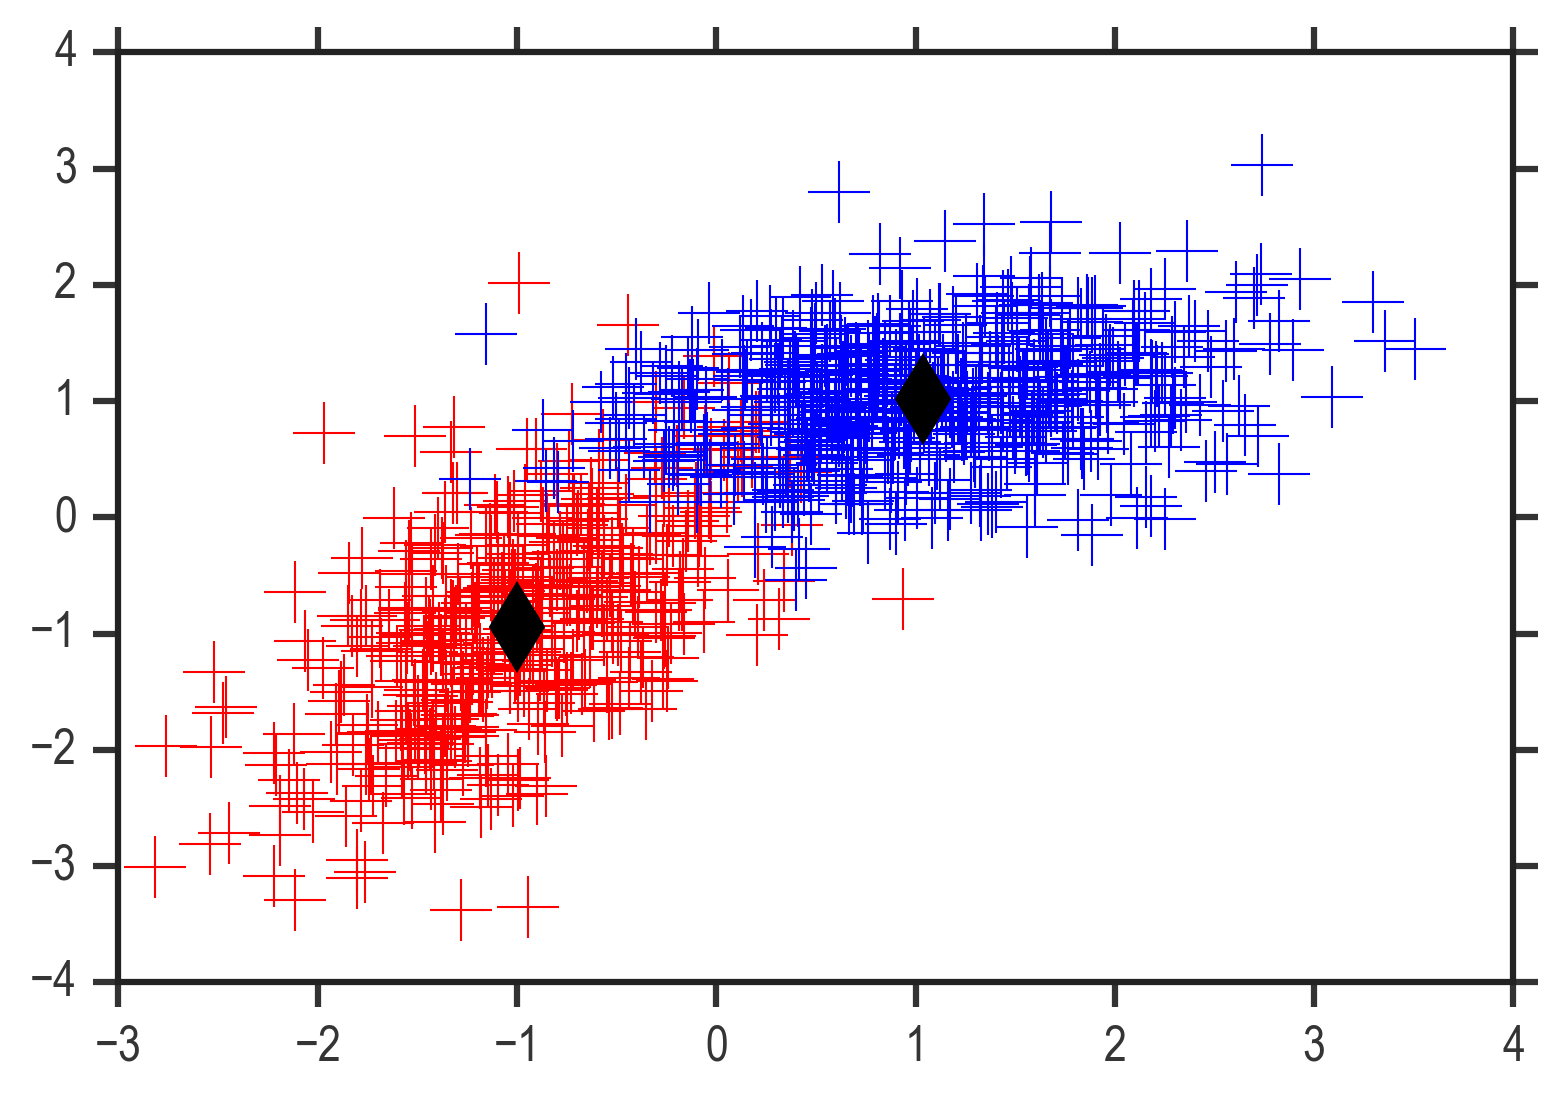

In [162]:
X, N, M = read_unlabeled_matrix(UNLABELED_FILE)
# initialization strategy 1
params = {}
pi, mu_0, mu_1, sigma_0, sigma_1 = MLE_Estimation()    
MLE_phi, MLE_lambda = MLE_of_phi_and_lamdba()
params['pi'] = pi
params['mu_0'] = mu_0
params['mu_1'] = mu_1
params['sigma_0'] = sigma_0
params['sigma_1'] = sigma_1
params['phi'] = MLE_phi
params['lambda'] = MLE_lambda
params, log_likelihood = perform_em(X, N, M, params)
for k, v in params.items():
    print k, '=', v
estimate_leanings_of_precincts(X, N, M, params=params)
plot_individual_inclinations(X, N, M, params=params)

In [167]:
summary = estimate_leanings_of_precincts(X, N, M, params=params)
for (i, p, leaning) in summary:
    print('%d & %e & %d \\\\' %(i,p,leaning))

0 & 1.000000e+00 & 1 \\
1 & 1.000000e+00 & 1 \\
2 & 6.460154e-10 & 0 \\
3 & 1.000000e+00 & 1 \\
4 & 8.073665e-13 & 0 \\
5 & 1.000000e+00 & 1 \\
6 & 1.000000e+00 & 1 \\
7 & 1.000000e+00 & 1 \\
8 & 1.000000e+00 & 1 \\
9 & 1.000000e+00 & 1 \\
10 & 1.598021e-09 & 0 \\
11 & 8.925052e-09 & 0 \\
12 & 3.062262e-12 & 0 \\
13 & 1.000000e+00 & 1 \\
14 & 9.999999e-01 & 1 \\
15 & 1.551280e-10 & 0 \\
16 & 6.062787e-12 & 0 \\
17 & 1.000000e+00 & 1 \\
18 & 1.000000e+00 & 1 \\
19 & 1.000000e+00 & 1 \\
20 & 3.222055e-13 & 0 \\
21 & 1.000000e+00 & 1 \\
22 & 9.999999e-01 & 1 \\
23 & 1.472638e-09 & 0 \\
24 & 1.000000e+00 & 1 \\
25 & 6.783303e-09 & 0 \\
26 & 6.122512e-13 & 0 \\
27 & 7.365053e-12 & 0 \\
28 & 1.000000e+00 & 1 \\
29 & 7.991876e-11 & 0 \\
30 & 1.000000e+00 & 1 \\
31 & 1.000000e+00 & 1 \\
32 & 1.000000e+00 & 1 \\
33 & 8.567079e-10 & 0 \\
34 & 1.000000e+00 & 1 \\
35 & 9.195766e-11 & 0 \\
36 & 1.000000e+00 & 1 \\
37 & 2.742825e-11 & 0 \\
38 & 3.300986e-11 & 0 \\
39 & 1.000000e+00 & 1 \\
40 & 5.295

In [168]:
summary0 = estimate_leanings_of_precincts(X, N, M, params=None)

In [169]:
diffs = [summary[i][1] - summary0[i][1] for i in range(N)]
for e,d in enumerate(diffs):
    print('%d, %d' %(e,d))

0, 0
1, 0
2, 0
3, 0
4, 0
5, 0
6, 0
7, 0
8, 0
9, 0
10, 0
11, 0
12, 0
13, 0
14, 0
15, 0
16, 0
17, 0
18, 0
19, 0
20, 0
21, 0
22, 0
23, 0
24, 0
25, 0
26, 0
27, 0
28, 0
29, 0
30, 0
31, 0
32, 0
33, 0
34, 0
35, 0
36, 0
37, 0
38, 0
39, 0
40, 0
41, 0
42, 0
43, 0
44, 0
45, 0
46, 0
47, 0
48, 0
49, 0
